<a href="https://colab.research.google.com/github/cunhajessica/Analise_Airbnb_Amsterdam/blob/main/Amsterdam_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="10%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


# Análise dos Dados do Airbnb - *Amsterdam*
---

<center><img src="https://a0.muscache.com/im/pictures/2fa807dd-afc0-4980-b406-cb9610cb7e3f.jpg?im_w=1680" height="400px"></center>



O [Airbnb](https://www.airbnb.com.br/) é considerado a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.


<left><img src="https://sacavoyage.fr/wp-content/uploads/AMSTERDAM7-1279x600.jpg" height="500px"></left>

A cidade de Amsterdã é a capital de Países Baixos, ou Holanda, como é popularmente conhecida. Ela é a cidade mais populosa do país e recebe turistas de todos os lugares do mundo. O principal transporte utilizado pelos habitantes é a bicicleta, e lá tem mais de mil pontes espalhadas pela cidade. Ela conta com diversos parques (com paisagens de tirar o fôlego), cafeterias e barzinhos, além de muitos museus famosos, como o Museu de Van Gohn, a casa da Anne Frank, que ainda conserva vestígios da 2ª Guerra Mundial, e o Museu da Heineken, para os amantes de cerveja. 

Localização: Vondelpark

<left><img src="https://dicaseuropa.com.br/wp-content/uploads/2014/05/amsterdam-vondelpark-parque.jpg" height="300px"></left>


Localização: Museu de Van Gohg

<left><img src="https://www.conexaoamsterdam.com.br/wp-content/uploads/2016/03/fachada-do-museu-do-van-gogh.jpg" height="310px"></left>


Localização: Museu e Casa de Anne Frank

<left><img src="https://j7e9e8a2.stackpathcdn.com/wp-content/uploads/2015/10/Anne-Frank-House-Amsterdam-e1569262463757.jpg" height="255px"></left>


Localização: Museu da Heineken

<left><img src="https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_600/https://turismonasuica.com/wp-content/uploads/2014/07/heineken-experience.jpg" height="310px"></left>


Se assim como eu, você também gostaria de conhecer Amsterdã, saiba que a cidade contempla muitas opções de hospedagem, com os mais variados valores, falaremos mais a respeito deles no decorrer do estudo.

**O objetivo desse projeto é auxiliar interessados em se hospedar em Amsterdã, efetuando uma análise exploratória dos dados do Airbnb na cidade.**





### **Dados Exploratórios**

<left><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></left>

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

Os dados que utilizados na nossa análise foi a versão resumida disponível no site: `listings.csv` *- Summary information and metrics for listings in Amsterdam (good for visualisations)*, datado em 06 de Janeiro de 2022. Os dados são constantemente atualizados pelo Airbnb.

### **Obtenção dos Dados**


Para a leitura do Dataframe e a manipulação dos dados, utilizamos a biblioteca Pandas. 

Os demais pacotes mencionados, são utilizados para a visualização de gráficos. 

In [198]:
# importar os pacotes necessarios
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import MarkerCluster #mapa de pontos

%matplotlib inline

In [199]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-01-06/visualisations/listings.csv')

### **Análise dos Dados Originais**


A análise de dados contemplará a extração, manipulação, análise e compreensão dos dados, neste caso, não utilizará aprendizado de máquina e inteligência artificial.

Abaixo, consta o dicionário das variáveis existentes no *dataset* que iremos analizar:

## Dicionário das variáveis:

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada 
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews que a propriedade possui nos últimos 12 meses
* `license` - licença ou número de registro para anunciar os espaços na Airbnb

## Informações gerais:

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [200]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,285,2021-11-21,1.83,1,51,7,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.35,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,227,2021-12-06,1.87,1,0,8,0363 974D 4986 7411 88D8
3,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,372,2021-12-12,2.69,2,206,36,0363 607B EA74 0BD8 2F6F
4,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,55,2,525,2022-01-02,3.99,2,193,46,0363 607B EA74 0BD8 2F6F


De imediato já podemos observar que a coluna `neighbourhood_group` possui dados "NaN". Esses dados são nulos, e devem ser tratados. Trataremos eles mais adiante.

Abaixo, verificamos a quantidade de dados do dataset, e os tipos de variáveis.

In [201]:
# identificar o volume de dados do DataFrame
print(f'Entradas: \t{df.shape[0]}')
print(f'Variáveis: \t{df.shape[1]}')

# verificar o tipo das variáveis
display(df.dtypes)

Entradas: 	5597
Variáveis: 	18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

O DataFrame possui 5597 linhas e 18 colunas, as quais chamaremos de entradas e variáveis. Quanto ao tipo de variáveis, temos `int64` (números inteiros), `float64` (números decimais) e `object` (texto).

### **Valores ausentes**

Vamos verificar a porcentagem por coluna, dos dados ausentes no dataset.

In [202]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.094158
last_review                       0.094158
license                           0.006253
longitude                         0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

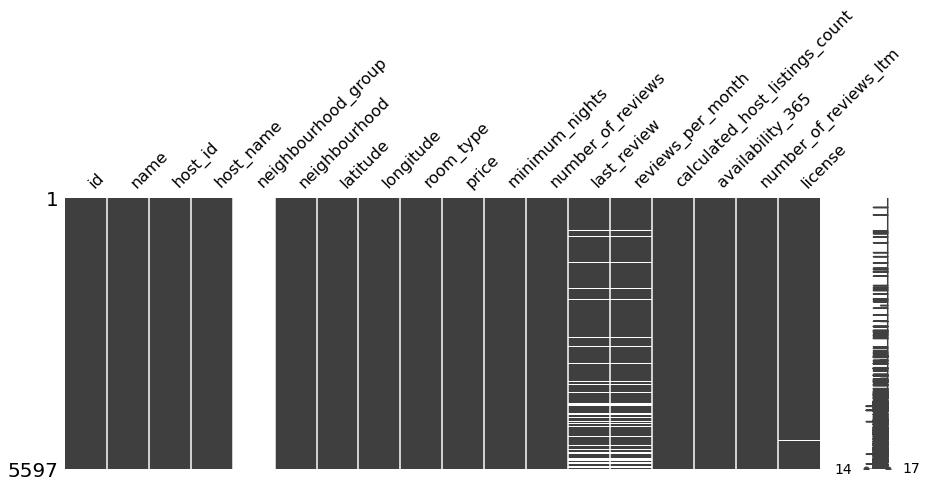

In [203]:
#gráfico de valores ausentes
missingno.matrix(df, figsize = (15,5));

Observamos que a coluna `neighbourhood_group` está 100% nula, a variável `reviwes_per_mouth` e `last_review` possuem 9,42% e a coluna `license` com 0,6% de valores nulos. As demais variáveis estão preenchidas de acordo.

Como a coluna `neighbourhood_group` não contém dados, poderá ser excluída.
Em relação às variáveis `reviwes_per_mouth`, `last_review`e `license`, não parecem ter algum tipo de relação entre elas, e como não serão consideradas na nossa análise, também iremos excluir esses dados nulos, mas nesse caso, iremos excluir apenas as entradas.

In [204]:
#fazendo a copia do dataframe original 
df_clean = df.copy()

#excluindo a coluna vazia
df_clean.drop(columns=['neighbourhood_group'], inplace=True)

#excluindo as entradas nulas
df_clean.dropna(axis=0, inplace=True)

### **Limpeza dos valores ausentes**

Conferindo se a limpeza foi feita.

In [205]:
#verificando os dados nulos de cada coluna
(df_clean.isnull().sum()).sort_values(ascending=False)


license                           0
room_type                         0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
price                             0
number_of_reviews_ltm             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
id                                0
dtype: int64

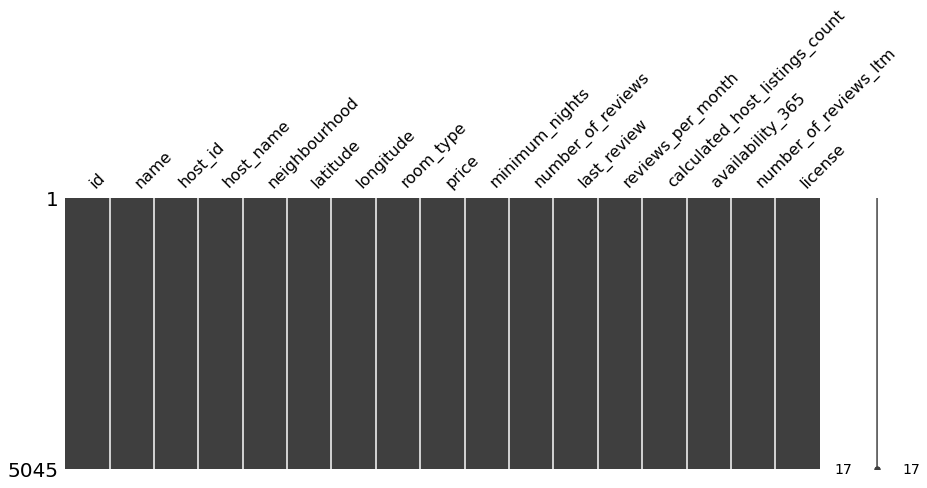

In [206]:
#grafico de dados nulos
missingno.matrix(df_clean, figsize = (15,5));

Com o gráfico, podemos observar que não há mais variáveis com dados nulos. Agora que esses dados foram tratados, partiremos para as demais análises.

### **Distribuição das variáveis e outliers** 

Há outliers presentes no dataframe original? 

Os outlies são dados que se encontram fora do padrão geral de uma distribuição. Nem sempre os outliers são valores incorretos, mas por estarem muito distante da média, alteram os dados estatísticos, prejudicando a análise.

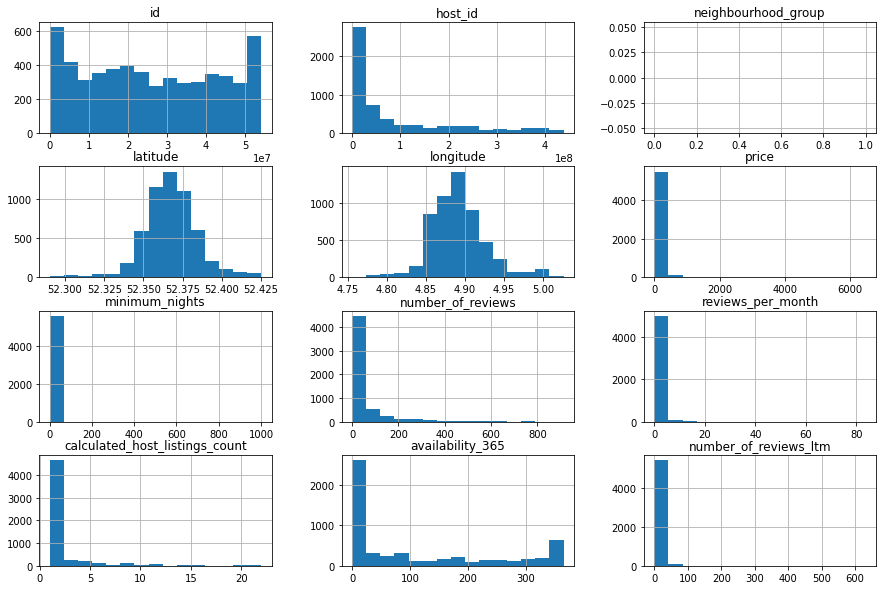

In [207]:
#plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Usando o histograma é possível observarmos a distribuição das variáveis e a presença de alguns outliers, como:
- `minimum_nights` - quantidade mínima de noites informa 1000 noites, mais do que 365 dias.
- `price` - possui valor maior que 6.000,00 Euros.


Abaixo, utilizaremos a função **describe()** para verificar as informações estatísticas dos dados, que também auxiliam na identificação de outlier.


In [208]:
#ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5597.000000,5597.000000,5597.000000,5070.000000,5597.000000,5597.000000,5597.000000
mean,163.928712,3.397892,49.141326,1.144730,2.162051,109.805431,6.439164
std,162.113721,14.884022,89.732896,2.184577,3.038060,132.308893,18.699844
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,95.000000,2.000000,4.000000,0.260000,1.000000,0.000000,0.000000
50%,135.000000,2.000000,17.000000,0.540000,1.000000,37.000000,1.000000
75%,198.000000,3.000000,47.000000,1.250000,2.000000,214.000000,6.000000
max,6477.000000,1001.000000,913.000000,83.690000,22.000000,365.000000,632.000000




Aqui, algumas coisas já chamam a nossa atenção, como por exemplo:

* A variável `price` tem o mínimo em 0.
* Lembrando que a variável `price` trata do preço da diária dos imóveis em moeda local (EUR), estamos vendo que 75% do valor está abaixo de 198 euros, porém seu valor máximo é 6.477,00 euros. Claramente, há outliers por aqui.
* A variável `minimum_nights` tem como seu máximo o valor 1001, sendo que 75% está em 3. Claramente temos outliers nessa variável também.
* As variáveis `number_of_reviews`, `calculated_host_listings_count`, `availability_365`e `number_of_reviews_ltm` também podem conter outliers, mas não vamos nos preocupar com elas agora.

### **Limpeza dos outliers**

Para verificar os limites a serem tratados será utilizado a regra do IQR Score. Seguiremos os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis. O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).
    
  IQR = Q3 - Q1
* Definir o limite superior e inferior para cortar os outliers.

  Preço superior = Q1 + 1.5 * IQR
  
  Preço Inferior = Q1 - 1.5 * IQR
* Remover os outliers.




In [209]:
#identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

#definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


IQR da variável price:  103.0
Limite superior de price:  352.5
Limite inferior de price:  -59.5


De acordo com os nossos cálculos, os dados acima de 352,50 euros e abaixo de -59,5 euros devem ser removidos da variável `price`. Como identificou valores negativos, iremos considerar o corte mínimo em zero euros.

O dataset possui 5597 colunas
259 Entradas acima de 352.5
Representam 4.63% do dataset


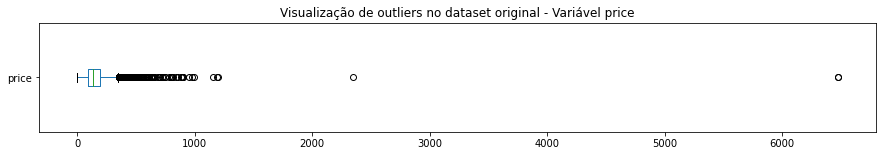

In [211]:
#gráfico Boxplot para visualização de outliers da coluna price
plt.subplots(figsize=(15,2));
df.price.plot(kind='box', vert=False);
plt.title('Visualização de outliers no dataset original - Variável price');

print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 352.5".format(len(df[df.price > 352.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 352.5]) / df.shape[0])*100))

In [212]:
#identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights:', IQR_minimum_nights)

#definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights:', sup_minimum_nights)
print('Limite inferior de minimum_nights:', inf_minimum_nights)

IQR da variável minimum_nights: 1.0
Limite superior de minimum_nights: 4.5
Limite inferior de minimum_nights: 0.5


Já para a variável `minumum_nights`, o corte ficou com os dados acima de 4,5 noites e abaixo de 0,5 noites.

O dataset possui 5597 colunas
765 Entradas acima de 4.5
Representam 13.67% do dataset


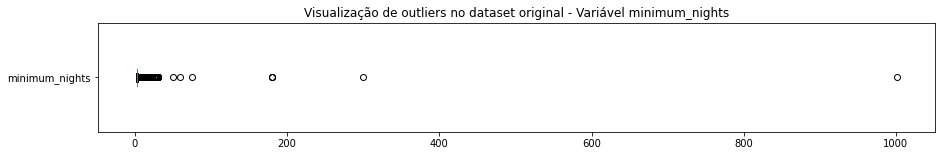

In [213]:
#grafico Boxplot para visualização de outliers da coluna minimum_nights
plt.subplots(figsize=(15,2));
df.minimum_nights.plot(kind='box', vert=False);
plt.title('Visualização de outliers no dataset original - Variável minimum_nights');

print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 4.5".format(len(df[df.minimum_nights > 4.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 4.5]) / df.shape[0])*100))



Remoção dos outliers:

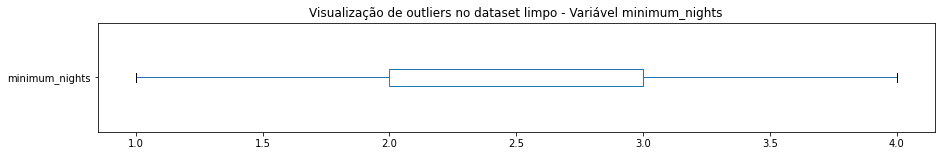

In [217]:
#remover o limite superior de minimum_nights
df_clean.drop(df_clean[df_clean.minimum_nights > 4.5].index, axis=0, inplace=True)
#remover o limite inferior de minimum_nights
df_clean.drop(df_clean[df_clean.minimum_nights < 0.5].index, axis=0, inplace=True)

#grafico Boxplot para visualização de outliers da coluna minimum_nights
plt.subplots(figsize=(15,2));
df_clean.minimum_nights.plot(kind='box', vert=False);
plt.title('Visualização de outliers no dataset limpo - Variável minimum_nights');

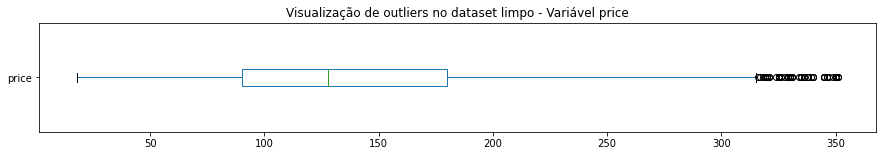

In [218]:
#remover os outliers utilizando o dataframe que já excluimos os dados nulos - df_clean
#remover o limites superior da variável price
df_clean.drop(df_clean[df_clean.price > 352.5].index, axis=0, inplace=True)
#remover o limite inferior da variável price
df_clean.drop(df_clean[df_clean.price < 0].index, axis=0, inplace=True)

#grafico Boxplot para visualização de outliers da coluna price
plt.subplots(figsize=(15,2));
df_clean.price.plot(kind='box', vert=False);
plt.title('Visualização de outliers no dataset limpo - Variável price');

Aqui podemos ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers, entretanto, esses estão sendo calculados em relação ao novo dataset, e nossa limpeza levou em consideração os quartis do dado original.

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.

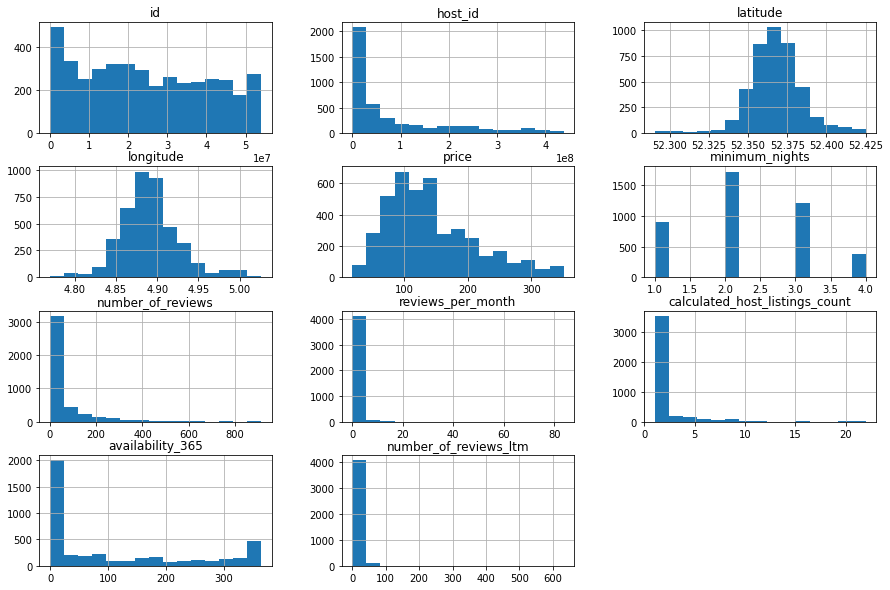

In [219]:
#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [220]:
#identificar o volume de dados do DataFrame tratado
print(f'Entradas: \t{df_clean.shape[0]}')
print(f'Variáveis: \t{df_clean.shape[1]}')

Entradas: 	4208
Variáveis: 	17


Após a remoção dos outliers, vemos que a escala no histograma está mais coerente com os dados. Depois da limpeza o nosso *dataset* ficou com 4208 entradas e 17 colunas.

### **Correlação existente entre as variáveis**

A correlação serve para descobrir o quanto uma variável influência na outra.

In [221]:
#criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews','calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

#mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.189000,-0.261019,-0.143345,-0.073788,-0.176613
minimum_nights,0.189000,1.000000,-0.147365,-0.309794,-0.295799,-0.227861
number_of_reviews,-0.261019,-0.147365,1.000000,-0.021795,0.245094,0.473497
calculated_host_listings_count,-0.143345,-0.309794,-0.021795,1.000000,0.301814,0.124297
availability_365,-0.073788,-0.295799,0.245094,0.301814,1.000000,0.262885
number_of_reviews_ltm,-0.176613,-0.227861,0.473497,0.124297,0.262885,1.000000


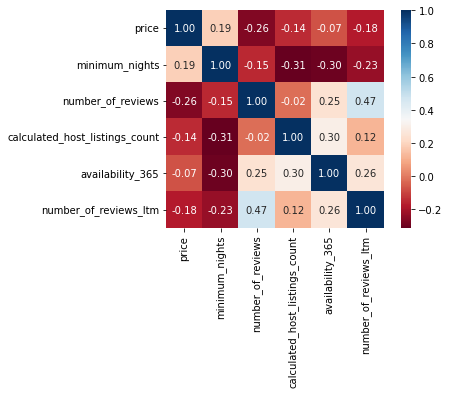

In [222]:
#plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Média de preço do aluguel**

In [223]:
#ver a média da coluna price
print(f'A média dos preços de aluguel são: Eur {df_clean.price.mean()}')


A média dos preços de aluguel são: Eur 142.24239543726236


Equivalente a 881,07 reais.


### **Média do mínimo de noites para aluguel ( variável `minimum_nights`)**

In [224]:
#ver a média da coluna minimum_nights
print(f'A média do mínimo de noites para aluguel são: {df_clean.minimum_nights.mean()} noites')

A média do mínimo de noites para aluguel são: 2.2497623574144487 noites


### **Tipo de imóvel mais alugado no Airbnb**

O Airbnb dispõe de quatro tipos de imóvel disponível para alugar: casas e apartamentos inteiros, quarto privado, quarto de hotel e quarto compartilhado.
Abaixo utilizamos a função `value_counts()` para verificar a quantidade para cada tipo.

In [225]:
#mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2576
Private room       1540
Hotel room           74
Shared room          18
Name: room_type, dtype: int64

In [226]:
#mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    61.216730
Private room       36.596958
Hotel room          1.758555
Shared room         0.427757
Name: room_type, dtype: float64

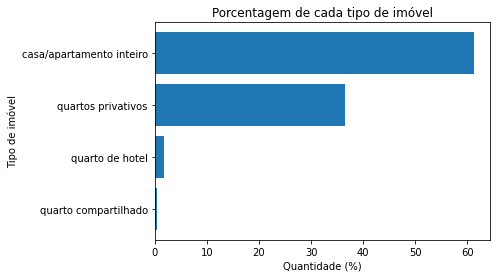

In [227]:
#gráfico indicando a porcentagem de cada tipo de imóvel disponível
tipo = ['quarto compartilhado', 'quarto de hotel', 'quartos privativos', 'casa/apartamento inteiro']
porcentagem = [0.42, 1.76, 36.60, 61.22]

plt.barh(tipo, porcentagem)

plt.ylabel('Tipo de imóvel')
plt.xlabel('Quantidade (%)')
plt.title('Porcentagem de cada tipo de imóvel')
plt.show()


No nosso conjunto de dados analisado temos: 61,22% de casas e apartamentos inteiros, 36,60% de quartos privados, 1,76% de quartos de hotel e 0,42% de quartos compartilhados.

###**Imóvel mais caro**


In [228]:
#mostrar o imóvel mais caro do dataset original
df.groupby(['name','room_type', 'neighbourhood']).price.max().sort_values(ascending=False)[:10]

name                                                room_type        neighbourhood         
Luxury Suites Amsterdam, Royal Penthouse            Private room     Centrum-Oost              6477
Luxury Suites Amsterdam, Imperial Suite             Private room     Centrum-Oost              6477
Luxury villa 5 mts walk from RAI                    Entire home/apt  Zuid                      2350
prinsenhuis beautiful apartments overlooking canal  Private room     Centrum-Oost              1200
Luxury houseboat in Amsterdam Centre! ( 3br 110m²)  Entire home/apt  Centrum-Oost              1190
Industrial loft  on edge Jordaan/Prinseneiland      Entire home/apt  Centrum-West              1160
Nice room in Amsterdam City                         Private room     De Aker - Nieuw Sloten     999
2. Secret Suite, Amsterdam’s best-kept secret       Private room     Oud-Noord                  980
Big trendy family loft in city center Amsterdam     Entire home/apt  Westerpark                 950
3. Mysti

O imóvel mais caro do dataset original analisado, é o Luxury Suites Amsterdam, Royal Penthouse que tem a diária com o custo de 6.477,00 Euros. Aproximadamente R$ 39.889,00 para passar a noite neste quarto privado.
<center><img src="https://a0.muscache.com/im/pictures/736c54fd-a977-4c83-b54d-a7a0ef59d010.jpg?im_w=960"height="400px"></center>


In [229]:
#mostrar o imóvel mais barato
df_clean.groupby(['name', 'room_type', 'neighbourhood']).price.max().sort_values(ascending=True)[:10]

name                                             room_type        neighbourhood         
Bed in 6-bed Dorm                                Shared room      Oud-Oost                  18
Generator - Bed in 4 bed Dorm                    Shared room      Oud-Oost                  19
Generator - Bed in 4 bed Female Dorm             Shared room      Oud-Oost                  20
Room in the heart of Amsterdam                   Private room     Centrum-Oost              21
Rebel dolphin                                    Entire home/apt  Oud-Noord                 21
1 Bed in 14 Bedded Mixed Dorm Shared Facilities  Hotel room       Oud-Noord                 23
Bed in 10 Bed Dorm                               Hotel room       Zuid                      24
Cozy room with PRIVATE balcony!                  Private room     De Baarsjes - Oud-West    25
Bed in 8 Bed Dorm                                Hotel room       Zuid                      26
1 Bed in 10 Bedded Girls Dorm En-suite           Hotel r

A opção mais barata do dataset analisado é um quarto compartilhado, em um albergue. A diária custa 18,00 Euros, aproximadamente 194,00 reais.
<center><img src="https://a0.muscache.com/im/pictures/2119909d-ed16-4e6e-b2ad-dd336a16fd65.jpg?im_w=960"height="400px"></center>

In [230]:
#mostrar imóvel mais visto no último ano
df.groupby(['name', 'room_type', 'neighbourhood', 'price']).number_of_reviews_ltm.max().sort_values(ascending=False)[:5]

name                                        room_type     neighbourhood           price
Eco-friendly Double Room by Vondelpark      Private room  De Baarsjes - Oud-West  56       632
Citiez Hotel Amsterdam: Small Double Room   Private room  Osdorp                  62       544
Sleep in a Hub!                             Hotel room    De Baarsjes - Oud-West  58       368
Citiez Hotel Amsterdam: Cozy Queen Room     Private room  Osdorp                  59       330
Eco-friendly Double Room in Museum Quarter  Private room  Zuid                    88       214
Name: number_of_reviews_ltm, dtype: int64

Utilizando o dataset original, identificamos que o imóvel com o maior número de visualizações foi o Eco-friendly Double Room by Vondelpark, com 632 visualizações no ano. O quarto privado tem a diária de 56 euros, aproximadamente 374 reais.
<center><img src="https://a0.muscache.com/im/pictures/4c01d53d-25bb-4cd0-ada7-8405bbb4f7d3.jpg?im_w=960"height="400px"></center>

### **Localidade mais cara e a mais barata do dataset**



In [231]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
De Pijp - Rivierenbuurt                   156.930952
Zuid                                      153.415385
Watergraafsmeer                           151.213592
Centrum-Oost                              150.816555
Westerpark                                149.401993
IJburg - Zeeburgereiland                  148.434783
De Baarsjes - Oud-West                    146.526899
Centrum-West                              142.789165
Oud-Oost                                  141.633065
Bos en Lommer                             131.480874
Oud-Noord                                 130.726744
Oostelijk Havengebied - Indische Buurt    130.306748
Buitenveldert - Zuidas                    124.735294
Noord-Oost                                123.986111
Geuzenveld - Slotermeer                   120.916667
Noord-West                                118.495575
Bijlmer-Oost                              112.636364
De Aker - Nieuw Sloten                    108.766667
Osdorp                          

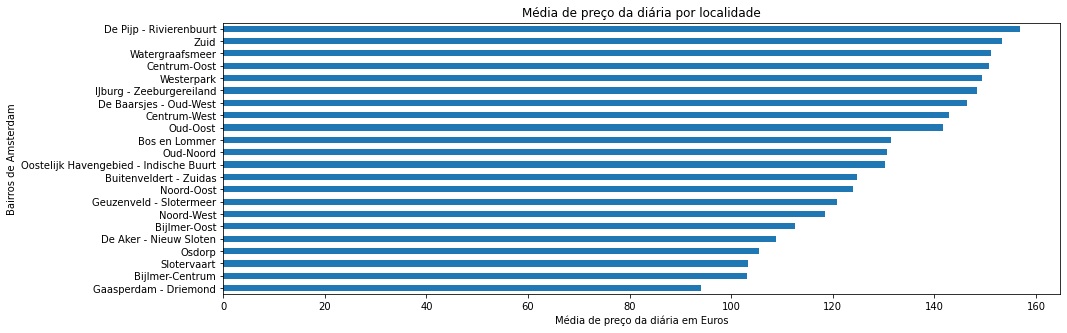

In [232]:
#grafico média de preço x bairros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True).plot(kind='barh', figsize=(15, 5));
plt.xlabel('Média de preço da diária em Euros')
plt.ylabel('Bairros de Amsterdam')
plt.title('Média de preço da diária por localidade');

De acordo com a nossa análise o bairro mais caro identificado no dataset foi o bairro De Pijp-Rivierenbuurt, com uma média de preço por noite de 156,93 Euros (968,52 Reais), e o bairro mais barato identificado foi o bairro Gaasperdam-Driemond com a média de preço de 94,12 Euros (580,88 Reais) por noite.

O bairro De Pijp é onde fica localizado o museu da Heineken e o famoso *Albert Cuypmarkt street market*, que é um mercado, tipo as nossas feirinhas de rua. É um ótimo bairro, mas de acordo com o site [iamamsterdam](https://www.iamsterdam.com/en/about-amsterdam/amsterdam-neighbourhoods) o bairro mais caro de Amsterdã é o bairro Zuid, onde fica os museus históricos e as butiques sofisticadas. 

Abaixo podemos identificar que o bairro Zuid possui 160 entradas a menos do que De Pijp, o que pode explicar nossos resultados.

In [233]:
#verificação dos bairros
df_clean.neighbourhood.value_counts()

Centrum-West                              683
De Baarsjes - Oud-West                    632
Centrum-Oost                              447
De Pijp - Rivierenbuurt                   420
Westerpark                                301
Zuid                                      260
Oud-Oost                                  248
Bos en Lommer                             183
Oud-Noord                                 172
Oostelijk Havengebied - Indische Buurt    163
IJburg - Zeeburgereiland                  115
Noord-West                                113
Watergraafsmeer                           103
Slotervaart                                77
Noord-Oost                                 72
Geuzenveld - Slotermeer                    60
Gaasperdam - Driemond                      34
Buitenveldert - Zuidas                     34
De Aker - Nieuw Sloten                     30
Osdorp                                     28
Bijlmer-Centrum                            22
Bijlmer-Oost                      

Já o bairro mais barato conforme a análise, é o bairro Gaasperdam-Driemond, este bairro segundo o site [amsterdam.nl](https://www.amsterdam.nl/en/districts/zuidoost/gaasperdam-driemond/), é um bairro rural de Amsterdã e por esse motivo possui os valores mais baixos, porém, não podemos afirmar porque possuímos poucos dados desse bairro, apenas 34 imóveis.

### **Mapa de localização dos imóveis**

Abaixo encontra-se um mapa interativo com os 5597 imóveis espalhados por Amsterdã. 

Para a isualização do gráfico utilizamos a biblioteca **folium**.

In [ ]:
#criando o mapa
mapa = folium.Map(location=[52.377956, 4.897070], tiles = 'cartodbpositron', zoom_start=11, control_scale=True)
#indicando as coordenadas
localização = list(zip(df["latitude"], df["longitude"]))
#criando os pontos
marker_cluster = MarkerCluster(localização)
#adicionando os pontos
marker_cluster.add_to(mapa)
#mostrando o mapa
mapa



## **Conclusões**


Com as análises, observamos a presença de dados ausentes e outliers, tendo a necessidade de tratamento dos dados.

Identificamos que a média de preço por noite é de 142,24 Euros. A média mínima de noites alugadas é de 2,25 noites, e o tipo de imóvel que mais recebe locações são casas e apartamentos inteiros. Identificamos também, o imóvel mais caro (Luxury Suites Amsterdam), o mais barato (Bed in 6-bed Dorm) e o que teve mais visualizações no ano (Eco-friendly Double Room by Vondelpark).

Em relação aos bairros de Amsterdã tivemos como resultados, De Pijp - Rivierenbuurt como o bairro mais caro e o bairro Gaasperdam - Driemond como o mais barato.

O dataset utilizado para as análises foi a versão resumida dos dados, onde efetuamos uma análise superficial, ideal apenas para uma abordagem inicial.